### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [55]:
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt  

In [56]:
df = pd.read_csv('vehicle.csv')

In [57]:
df.shape

(846, 19)

In [58]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [61]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


In [62]:
data = df.reset_index(drop=True)
data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
6,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
7,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
8,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
9,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


In [63]:
data.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [64]:
print(data['class'].value_counts())

car    413
bus    205
van    195
Name: class, dtype: int64


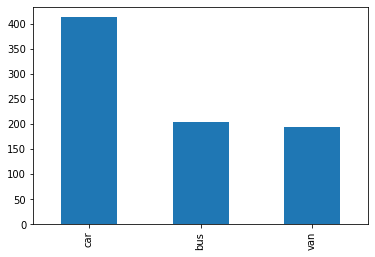

In [65]:
data['class'].value_counts().plot(kind='bar')

### Check for any missing values in the data 

In [66]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [67]:
data1 = data.drop('class',axis = 1)

In [68]:
from scipy.stats import zscore
s_data = data1.apply(zscore)

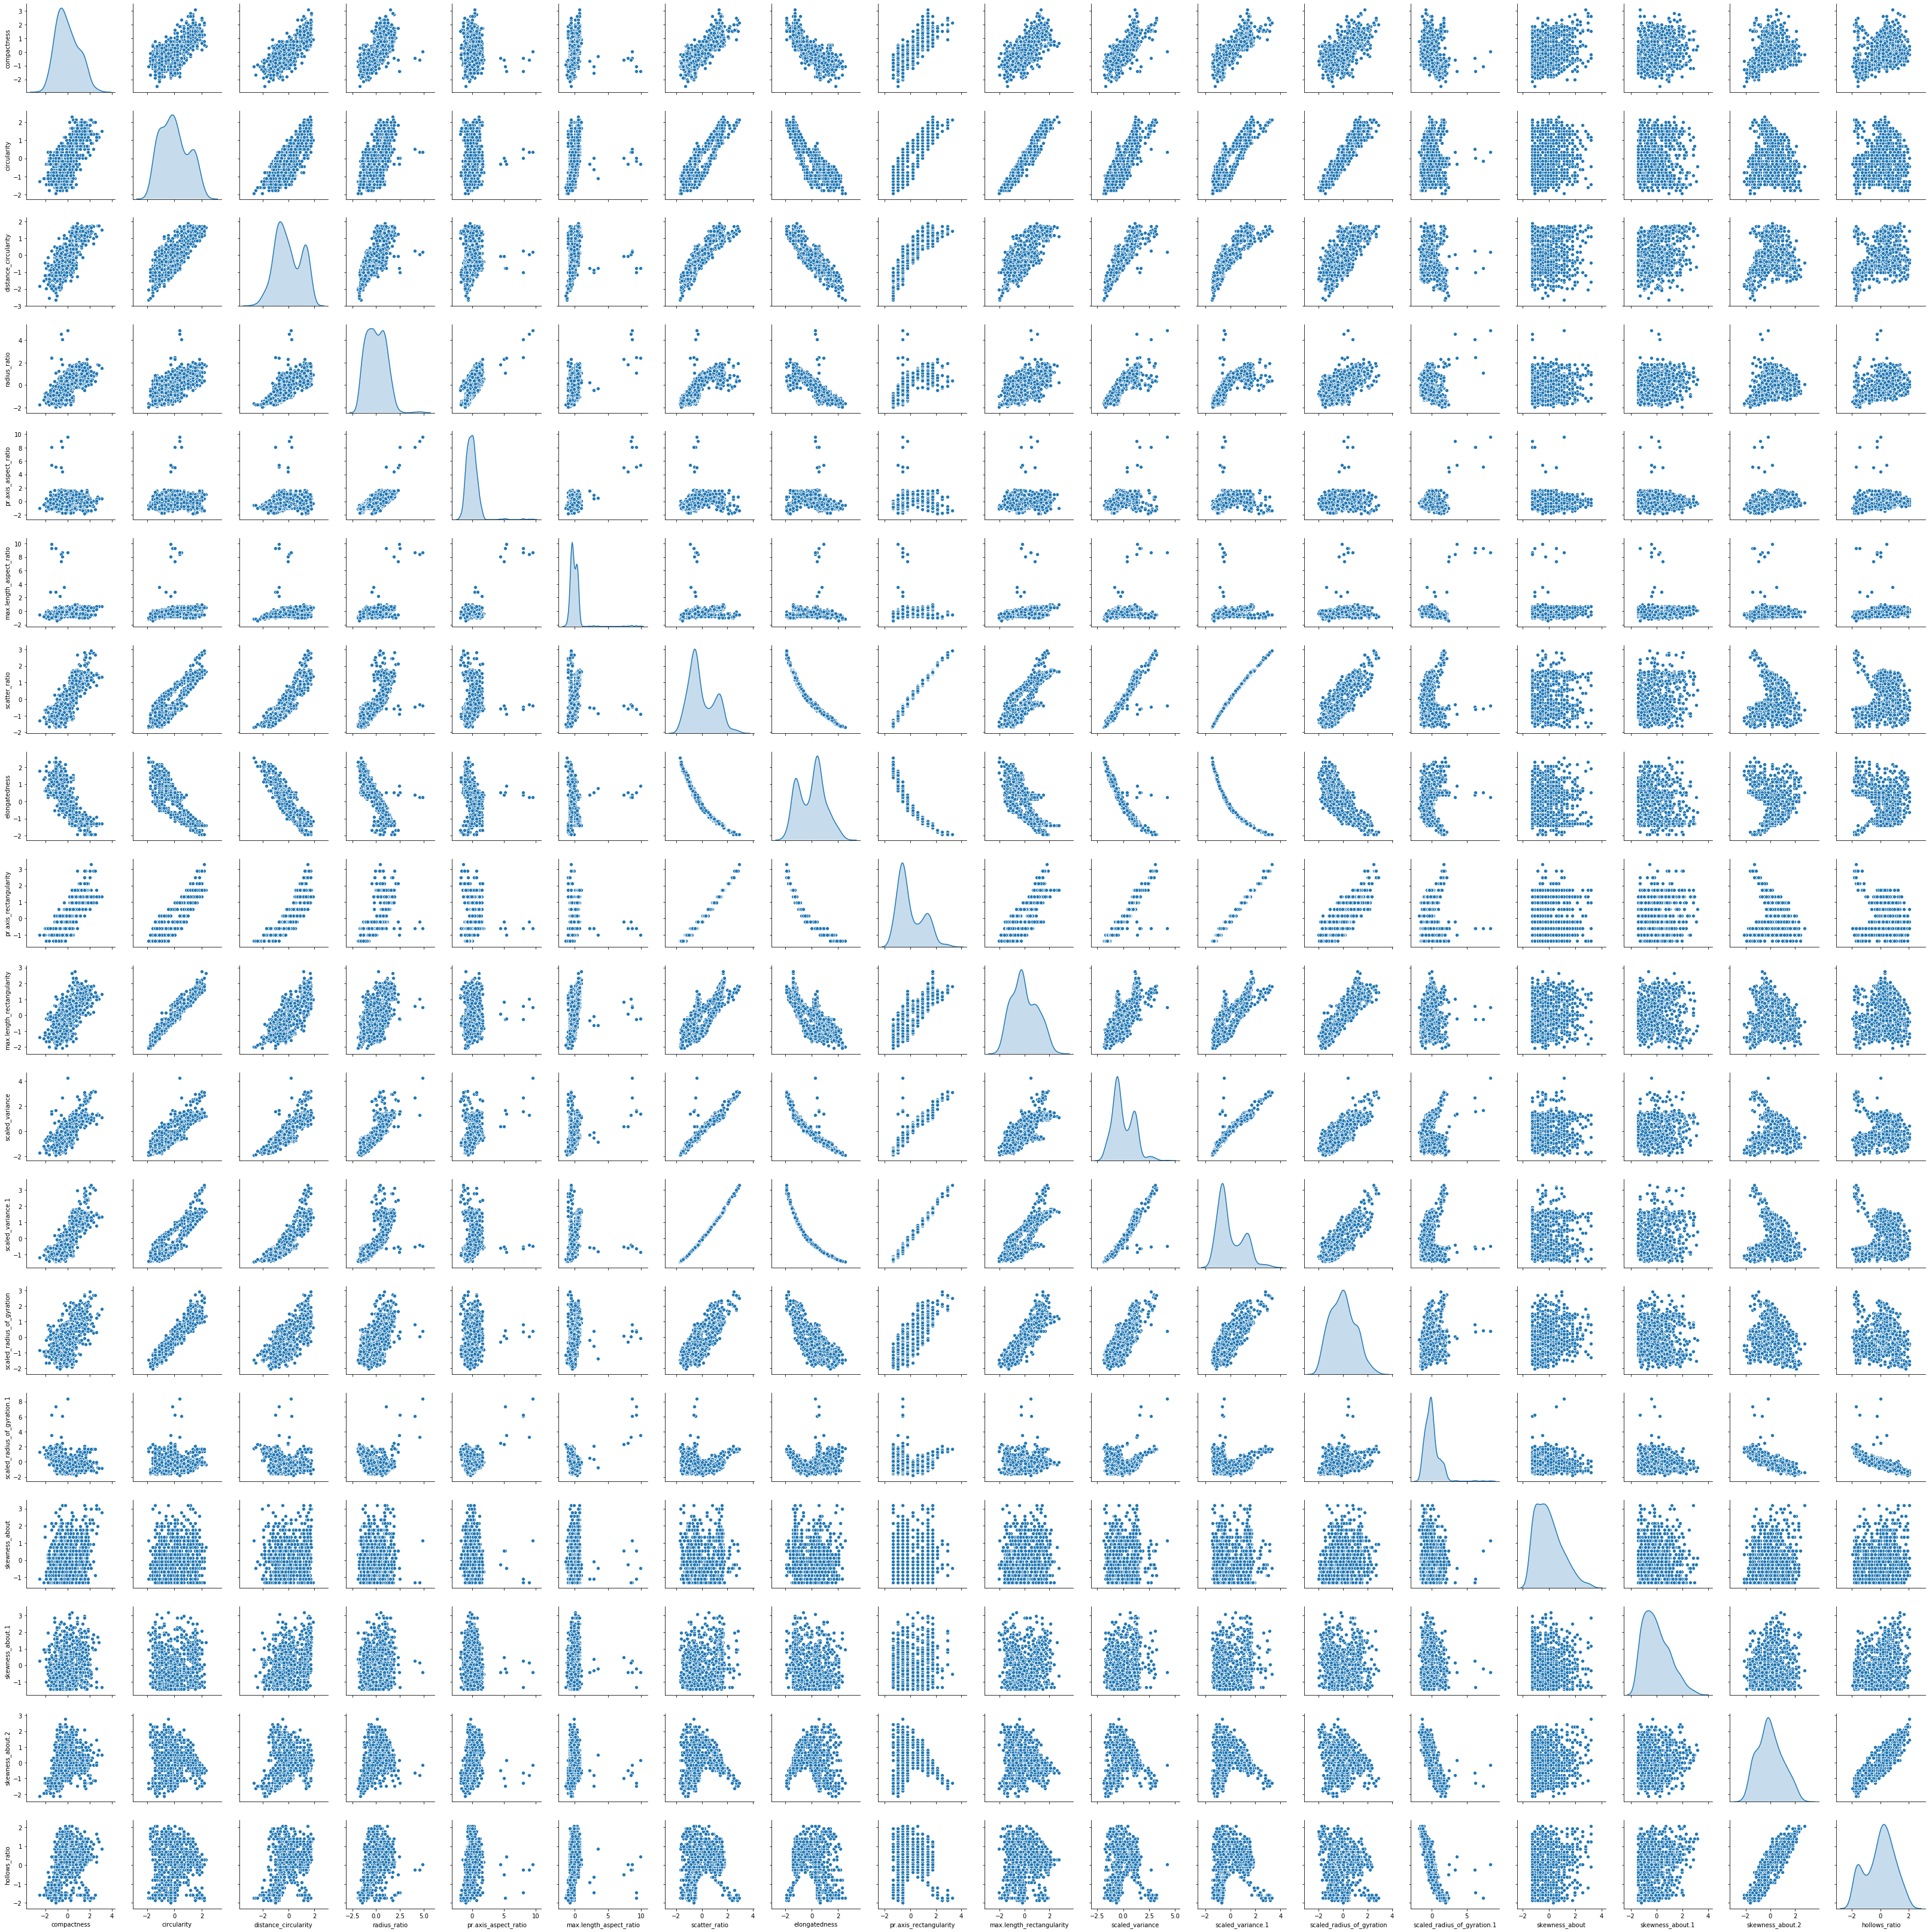

In [69]:
import seaborn as sns
sns.pairplot(s_data,diag_kind='kde')

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [70]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [71]:
cluster_range = range( 1, 11)  
#cluster_sil_scores = []
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(s_data)
  labels = clusters.labels_                    
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )    
#cluster_sil_scores.append(metrics.silhouette_score(s_data, labels, metric='euclidean'))



clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.333282
4,5,5193.019499
5,6,4706.580306
6,7,4355.139334
7,8,4106.471555
8,9,3846.202702
9,10,3706.781411


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

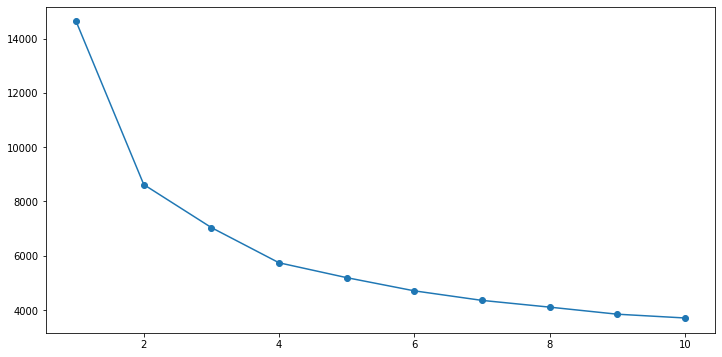

In [72]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

 -  The elbow plot shows that 5 might be a good choice for K.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [73]:
kmeans = KMeans( n_clusters = 5, random_state = 1 )
kmeans.fit(s_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [75]:
centroids = kmeans.cluster_centers_

print("Centroid values")
print(centroids)

Centroid values
[[-0.94318524 -0.53206584 -0.91952    -1.09575084 -0.55832928 -0.32255367
  -0.78582262  0.87504576 -0.75141473 -0.50542774 -0.80765777 -0.78890657
  -0.3942499   0.81240666 -0.10423066 -0.29003966 -1.06978893 -1.14293681]
 [ 0.11720891  0.04744951  0.23210601  0.40464412  0.3007858  -0.0446021
   0.07405786 -0.27704118  0.01754732  0.00950811  0.11402108  0.02247623
   0.03321621 -0.45028418  0.08607683 -0.04059124  0.532586    0.4783291 ]
 [ 1.25474585  1.31131529  1.29070636  0.97420313  0.0505986   0.25380761
   1.41255004 -1.28262193  1.42885758  1.23566734  1.29308575  1.4325696
   1.21994154 -0.03822562  0.21349071  0.31038019 -0.10500284  0.13849008]
 [-0.38396175 -0.92729278 -0.57873604 -0.28499527  0.06314773 -0.23225889
  -0.73179128  0.65627622 -0.74118006 -0.84618675 -0.69665387 -0.70255704
  -0.98291373 -0.75994225 -0.18785926  0.03981455  0.9877219   0.83068302]
 [-0.73302434  0.07273496 -0.27217095  2.94768327  6.8366519   8.69670551
  -0.535008    0.466

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [76]:
centroid_df = pd.DataFrame(centroids, columns = list(s_data) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.943185,-0.532066,-0.919520,-1.095751,-0.558329,-0.322554,-0.785823,0.875046,-0.751415,-0.505428,-0.807658,-0.788907,-0.394250,0.812407,-0.104231,-0.290040,-1.069789,-1.142937
1,0.117209,0.047450,0.232106,0.404644,0.300786,-0.044602,0.074058,-0.277041,0.017547,0.009508,0.114021,0.022476,0.033216,-0.450284,0.086077,-0.040591,0.532586,0.478329
2,1.254746,1.311315,1.290706,0.974203,0.050599,0.253808,1.412550,-1.282622,1.428858,1.235667,1.293086,1.432570,1.219942,-0.038226,0.213491,0.310380,-0.105003,0.138490
3,-0.383962,-0.927293,-0.578736,-0.284995,0.063148,-0.232259,-0.731791,0.656276,-0.741180,-0.846187,-0.696654,-0.702557,-0.982914,-0.759942,-0.187859,0.039815,0.987722,0.830683
4,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [77]:
labels = clusters.labels_ 
labels

array([7, 7, 3, 8, 5, 9, 8, 8, 8, 8, 7, 7, 1, 3, 0, 4, 3, 7, 0, 9, 8, 1,
       7, 0, 3, 1, 0, 7, 8, 8, 3, 4, 0, 5, 3, 7, 1, 0, 7, 4, 3, 7, 6, 0,
       7, 9, 0, 4, 3, 9, 2, 8, 1, 7, 3, 6, 1, 6, 0, 7, 1, 0, 3, 7, 1, 3,
       4, 0, 7, 1, 4, 0, 7, 3, 8, 6, 4, 2, 7, 6, 4, 0, 3, 4, 3, 7, 7, 3,
       7, 7, 1, 0, 5, 9, 8, 6, 1, 1, 6, 0, 1, 7, 7, 0, 6, 7, 9, 1, 3, 9,
       0, 7, 8, 6, 7, 7, 7, 7, 9, 1, 1, 4, 4, 6, 3, 5, 7, 8, 6, 7, 4, 3,
       0, 9, 3, 9, 4, 9, 4, 1, 1, 4, 3, 7, 2, 8, 6, 4, 0, 3, 4, 6, 3, 3,
       4, 3, 7, 6, 3, 2, 9, 3, 7, 4, 4, 4, 0, 3, 0, 8, 6, 1, 4, 4, 9, 3,
       4, 9, 7, 2, 4, 0, 3, 7, 0, 0, 7, 4, 3, 3, 8, 7, 7, 7, 3, 4, 6, 4,
       3, 6, 7, 3, 7, 8, 3, 7, 7, 6, 8, 3, 8, 3, 0, 0, 0, 0, 3, 8, 7, 4,
       3, 7, 4, 9, 0, 3, 7, 6, 4, 4, 3, 0, 3, 7, 9, 7, 3, 4, 9, 1, 3, 0,
       4, 8, 8, 1, 0, 9, 8, 0, 7, 1, 4, 2, 9, 7, 0, 3, 4, 1, 7, 0, 3, 7,
       7, 1, 0, 6, 5, 7, 8, 2, 8, 1, 6, 4, 4, 3, 9, 4, 8, 7, 7, 3, 3, 3,
       1, 7, 7, 3, 0, 0, 6, 1, 0, 3, 2, 0, 1, 4, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [90]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [91]:
b

array([[ 1.07940833, 18.62677479],
       [ 2.89254028, 22.63834757],
       [ 0.39368817, 20.14487383],
       [ 0.39803686, 17.81906475],
       [ 0.31379022, 22.08683562],
       [-1.17935376, 16.81401581],
       [ 0.83537986, 22.66654527],
       [ 0.8424148 , 20.15186532],
       [ 1.79168306, 21.39057165],
       [ 0.06320471, 17.61605494],
       [-0.29890672, 19.43080962],
       [-1.4102903 , 23.11752635],
       [-0.43774548, 22.45220458],
       [ 0.93158345, 17.95805416],
       [ 0.28054628, 22.86252513],
       [-3.16511627, 19.35517465],
       [ 1.13847574, 17.13678891],
       [-1.09545925, 21.14559833],
       [-1.90181564, 20.84215813],
       [ 0.81623412, 19.26994891],
       [-0.44861521, 16.71744818],
       [ 3.01212487, 22.14457147],
       [ 0.61440877, 18.22862105],
       [-2.48679936, 19.07294503],
       [ 0.78272867, 24.98665372],
       [-1.2398162 , 18.73806171],
       [ 1.83769918, 19.09336763],
       [ 2.68230139, 20.34841795],
       [ 1.25841886,

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [92]:
data1= np.concatenate([a,b,c])

In [93]:
d_f1 = pd.DataFrame(data1)

In [94]:
print(d_f1)

             0          1
0    13.882785   4.438501
1    11.687256   1.250981
2    10.316397   1.449346
3     9.837412  -2.041974
4     8.691601  -4.289773
..         ...        ...
245   9.248848  24.346291
246   6.958291  16.448655
247  11.260042  20.333577
248   6.889835  21.238297
249  11.221498  24.025093

[250 rows x 2 columns]


### 10. Use scatter matrix to print all the 3 distributions

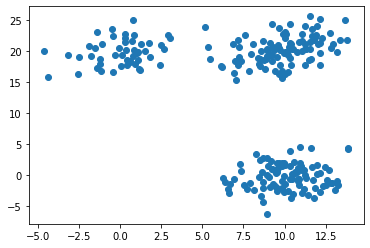

In [95]:
plt.scatter(d_f1[0],d_f1[1])

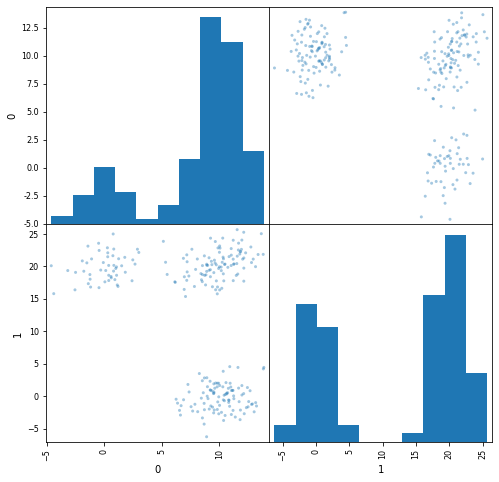

In [96]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(d_f1, alpha=0.4,figsize=(8,8))
plt.show()

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [97]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 

In [98]:
import scipy
scipy.cluster.hierarchy.linkage(d_f1, method='ward', metric='euclidean')

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

In [99]:
Z = linkage(d_f1, 'ward')
c, coph_dists = cophenet(Z , pdist(d_f1))

c

0.9536963071171022

### 12. Plot the dendrogram for the consolidated dataframe

In [100]:
Z.shape

Z[1]
Z[1:10]

array([[1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00]])

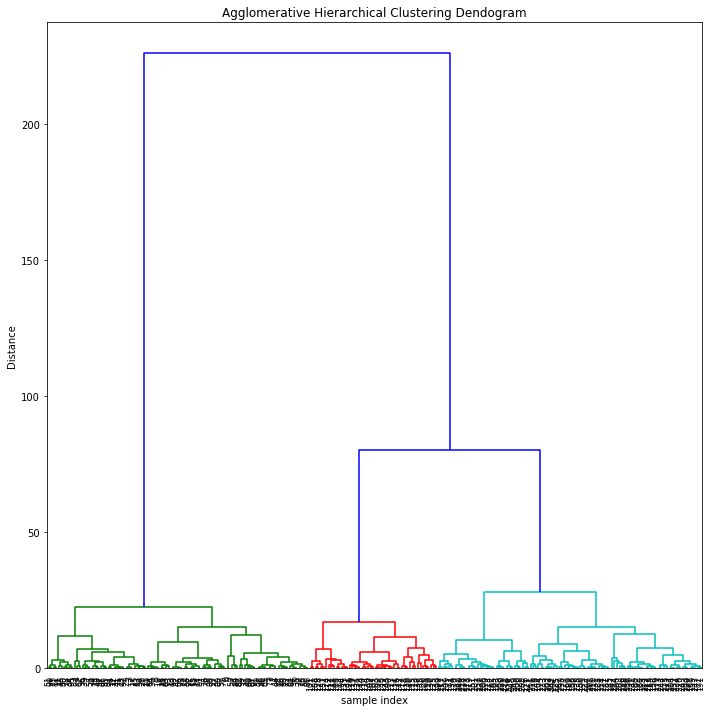

In [101]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

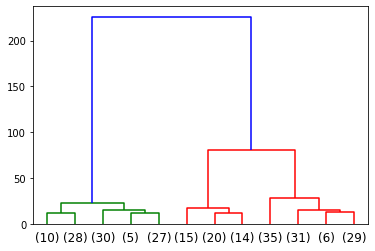

In [102]:
import scipy 
scipy.cluster.hierarchy.dendrogram(Z,p=12,truncate_mode='lastp')
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [103]:
scipy.cluster.hierarchy.fcluster(Z, t=29, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [104]:
a = scipy.cluster.hierarchy.fcluster(Z, t=80, criterion='distance')
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [105]:
clt = scipy.cluster.hierarchy.fcluster(Z, t=29, criterion='distance')
clt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

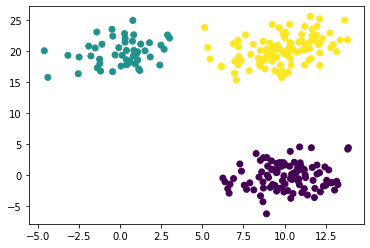

In [106]:
plt.scatter(d_f1[0],d_f1[1],c=clt)

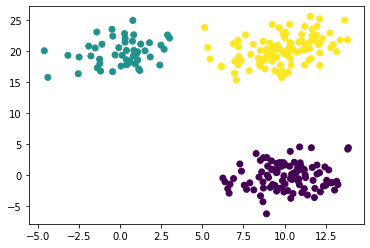

In [107]:
plt.scatter(d_f1[0],d_f1[1],c=a)